In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the feather file
data = pd.read_feather('massBV.feather')

In [3]:
# Remove the environmental variables (assuming first 9 columns are environmental)
snp_data = data.iloc[:, 9:]
pop = data["hatchisland"]
del data

# Fill NAs with column mean
snp_data = snp_data.apply(lambda x: x.fillna(x.mean()), axis=0)

In [4]:
# Standardize the SNP data (mean = 0, variance = 1)
scaler = StandardScaler(with_mean=True, with_std=False)
scaled_snp_data = scaler.fit_transform(snp_data)

In [5]:
# Perform PCA
pca = PCA(n_components=10)
pca_result = pca.fit_transform(scaled_snp_data)

# Add PCA results to a dataframe
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df['Population'] = pop

In [6]:
print(sum(pca.explained_variance_ratio_))

0.08650234988022268


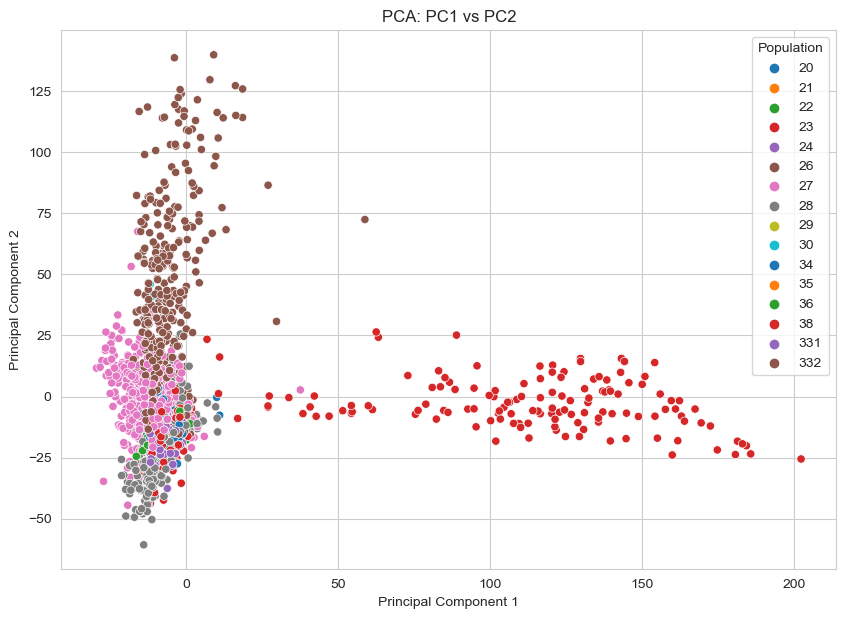

In [7]:
# Plot PC1 vs PC2
sns.set_style(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2', 
    hue='Population', 
    palette='tab10', 
    data=pca_df,
    legend='full'
)
plt.title('PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Population')
plt.show()

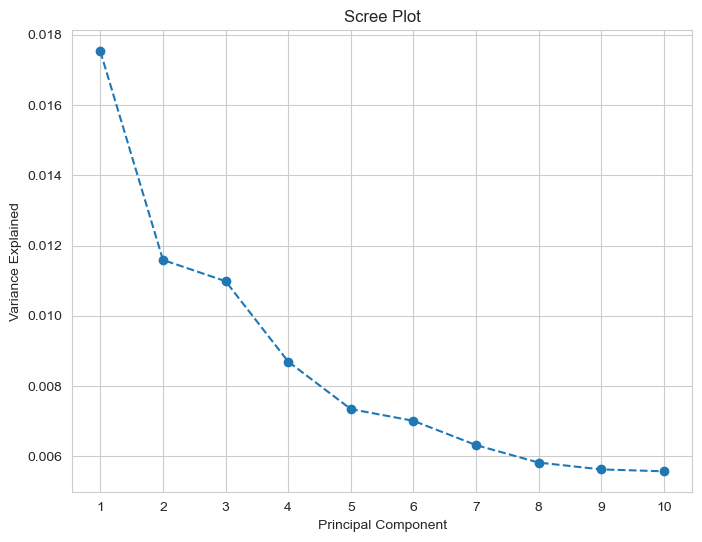

In [10]:
# Scree plot
explained_variance = pca.explained_variance_ratio_[0:10]
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(np.arange(1, len(explained_variance)+1))
plt.show()